In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import seaborn as sns
import os
import sys
import pickle
from glob import glob

sns.set(style='ticks', context='notebook', font_scale=1.2)

In [4]:

#---------------------------------------
# LOAD DATASET AND SET RANK INFORMATION
#---------------------------------------

lookup = pd.read_csv('../reference-and-data/lookup_table.csv')
print(lookup.shape)

# select only the feasible syntheses and rank them
lookup_feas = lookup[lookup.synthesis_success==1]
print(lookup_feas.shape)
lookup_feas.head()
lookup_feas = lookup_feas.sort_values(by='abl1_pIC50', ascending=False)
lookup_feas['rank'] = np.arange(lookup_feas.shape[0])+1
lookup_feas.head()

(270, 10)
(213, 10)


,template_name,alkyne_name,template_smi,alkyne_smi,molecule_smi,synthesis_success,synthesis_success_prob,is_experiment_x,abl1_pIC50,abl1_pIC50_std,rank
4,8-1,22-5,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cncc2nccn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1,1.0,1,9.69897,1.0,1
248,19,22-6,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C#Cc1cnc2cnccn12,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4cnc5cnccn45)n(C...,1,1.0,1,9.39794,1.0,2
140,16-1,22-6,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2cnccn12,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1,1.0,1,9.00000,1.0,3
167,16-2,22-6,Cc1ccc(NC(=O)c2ccc(CN3CCN(CCO)CC3)c(C(F)(F)F)c...,C#Cc1cnc2cnccn12,Cc1ccc(NC(=O)c2ccc(CN3CCN(CCO)CC3)c(C(F)(F)F)c...,1,1.0,1,8.69897,1.0,4
247,19,22-5,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C#Cc1cncc2nccn12,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4cncc5nccn45)n(C...,1,1.0,1,8.69897,1.0,5



## Load results


In [5]:
#--------
# RANDOM
#--------

# random
with open('random/results.pkl', 'rb') as content:
    data_random = pickle.load(content)

    
#---------
# GRYFFIN
#---------

# naive
with open('__GRYFFIN_/naive_gryffin-naive-0/results.pkl', 'rb') as content:
    data_naive_naive_0 = pickle.load(content)
with open('__GRYFFIN_/naive_gryffin-fia-1000/results.pkl', 'rb') as content:
    data_naive_fia_1000 = pickle.load(content)
    
with open('__GRYFFIN_/static_gryffin-naive-0/results.pkl', 'rb') as content:
    data_static_naive_0 = pickle.load(content)
with open('__GRYFFIN_/static_gryffin-fia-1000/results.pkl', 'rb') as content:
    data_static_fia_1000 = pickle.load(content)
    
with open('__GRYFFIN_/dynamic_gryffin-naive-0/results.pkl', 'rb') as content:
    data_dynamic_naive_0 = pickle.load(content)
with open('__GRYFFIN_/dynamic_gryffin-fia-1000/results.pkl', 'rb') as content:
    data_dynamic_fia_1000 = pickle.load(content)
    
    
# fwa
with open('__GRYFFIN_/naive_gryffin-fwa-0/results.pkl', 'rb') as content:
    data_naive_fwa_0 = pickle.load(content)

with open('__GRYFFIN_/static_gryffin-fwa-0/results.pkl', 'rb') as content:
    data_static_fwa_0 = pickle.load(content)
    
with open('__GRYFFIN_/dynamic_gryffin-fwa-0/results.pkl', 'rb') as content:
    data_dynamic_fwa_0 = pickle.load(content)
    
    
# fca
with open('__GRYFFIN_/naive_gryffin-fca-0.2/results.pkl', 'rb') as content:
    data_naive_fca_02 = pickle.load(content)
with open('__GRYFFIN_/naive_gryffin-fca-0.5/results.pkl', 'rb') as content:
    data_naive_fca_05 = pickle.load(content)
with open('__GRYFFIN_/naive_gryffin-fca-0.8/results.pkl', 'rb') as content:
    data_naive_fca_08 = pickle.load(content)
    
with open('__GRYFFIN_/static_gryffin-fca-0.2/results.pkl', 'rb') as content:
    data_static_fca_02 = pickle.load(content)
with open('__GRYFFIN_/static_gryffin-fca-0.5/results.pkl', 'rb') as content:
    data_static_fca_05 = pickle.load(content)
with open('__GRYFFIN_/static_gryffin-fca-0.8/results.pkl', 'rb') as content:
    data_static_fca_08 = pickle.load(content)
    
with open('__GRYFFIN_/dynamic_gryffin-fca-0.2/results.pkl', 'rb') as content:
    data_dynamic_fca_02 = pickle.load(content)
with open('__GRYFFIN_/dynamic_gryffin-fca-0.5/results.pkl', 'rb') as content:
    data_dynamic_fca_05 = pickle.load(content)
with open('__GRYFFIN_/dynamic_gryffin-fca-0.8/results.pkl', 'rb') as content:
    data_dynamic_fca_08 = pickle.load(content)
    
# fia
with open('__GRYFFIN_/naive_gryffin-fia-0.5/results.pkl', 'rb') as content:
    data_naive_fia_05 = pickle.load(content)
with open('__GRYFFIN_/naive_gryffin-fia-1/results.pkl', 'rb') as content:
    data_naive_fia_1 = pickle.load(content)
with open('__GRYFFIN_/naive_gryffin-fia-2/results.pkl', 'rb') as content:
    data_naive_fia_2 = pickle.load(content)
    
with open('__GRYFFIN_/static_gryffin-fia-0.5/results.pkl', 'rb') as content:
    data_static_fia_05 = pickle.load(content)
with open('__GRYFFIN_/static_gryffin-fia-1/results.pkl', 'rb') as content:
    data_static_fia_1 = pickle.load(content)
with open('__GRYFFIN_/static_gryffin-fia-2/results.pkl', 'rb') as content:
    data_static_fia_2 = pickle.load(content)
    
with open('__GRYFFIN_/dynamic_gryffin-fia-0.5/results.pkl', 'rb') as content:
    data_dynamic_fia_05 = pickle.load(content)
with open('__GRYFFIN_/dynamic_gryffin-fia-1/results.pkl', 'rb') as content:
    data_dynamic_fia_1 = pickle.load(content)
with open('__GRYFFIN_/dynamic_gryffin-fia-2/results.pkl', 'rb') as content:
    data_dynamic_fia_2 = pickle.load(content)
    

#---------
# BOTORCH
#---------

# naive
with open('wodesc_botorch-naive-0/results.pkl', 'rb') as content:
    data_wodesc_botorch_naive_0 = pickle.load(content)
with open('wodesc_botorch-naive-replace/results.pkl', 'rb') as content:
    data_wodesc_botorch_naive_replace = pickle.load(content)
with open('wodesc_botorch-naive-fia-1000/results.pkl', 'rb') as content:
    data_wodesc_botorch_fia_1000 = pickle.load(content)
    
# with open('desc_botorch-naive-0/results.pkl', 'rb') as content:
#     data_desc_botorch_naive_0 = pickle.load(content)
# with open('desc_botorch-naive-fia-1000/results.pkl', 'rb') as content:
#     data_desc_botorch_fia_1000 = pickle.load(content)
    
with open('desc_mord_botorch-naive-0/results.pkl', 'rb') as content:
    data_desc_mord_botorch_naive_0 = pickle.load(content)
with open('desc_mord_botorch-naive-replace/results.pkl', 'rb') as content:
    data_desc_mord_botorch_naive_replace = pickle.load(content)
with open('desc_mord_botorch-naive-fia-1000/results.pkl', 'rb') as content:
    data_desc_mord_botorch_fia_1000 = pickle.load(content)
    
    
# fwa
with open('wodesc_botorch-fwa-0/results.pkl', 'rb') as content:
    data_wodesc_botorch_fwa_0 = pickle.load(content)
    
# with open('desc_botorch-fwa-0/results.pkl', 'rb') as content:
#     data_desc_botorch_fwa_0 = pickle.load(content)
    
with open('desc_mord_botorch-fwa-0/results.pkl', 'rb') as content:
    data_desc_mord_botorch_fwa_0 = pickle.load(content)
    
    
# fca
with open('wodesc_botorch-fca-0.2/results.pkl', 'rb') as content:
    data_wodesc_botorch_fca_02 = pickle.load(content)
with open('wodesc_botorch-fca-0.5/results.pkl', 'rb') as content:
    data_wodesc_botorch_fca_05 = pickle.load(content)
with open('wodesc_botorch-fca-0.8/results.pkl', 'rb') as content:
    data_wodesc_botorch_fca_08 = pickle.load(content)
    
# with open('desc_botorch-fca-0.2/results.pkl', 'rb') as content:
#     data_desc_botorch_fca_02 = pickle.load(content)
# with open('desc_botorch-fca-0.5/results.pkl', 'rb') as content:
#     data_desc_botorch_fca_05 = pickle.load(content)
# with open('desc_botorch-fca-0.8/results.pkl', 'rb') as content:
#     data_desc_botorch_fca_08 = pickle.load(content)
    
with open('desc_mord_botorch-fca-0.2/results.pkl', 'rb') as content:
    data_desc_mord_botorch_fca_02 = pickle.load(content)
with open('desc_mord_botorch-fca-0.5/results.pkl', 'rb') as content:
    data_desc_mord_botorch_fca_05 = pickle.load(content)
with open('desc_mord_botorch-fca-0.8/results.pkl', 'rb') as content:
    data_desc_mord_botorch_fca_08 = pickle.load(content)
    
# fia
with open('wodesc_botorch-fia-0.5/results.pkl', 'rb') as content:
    data_wodesc_botorch_fia_05 = pickle.load(content)
with open('wodesc_botorch-fia-1/results.pkl', 'rb') as content:
    data_wodesc_botorch_fia_1 = pickle.load(content)
with open('wodesc_botorch-fia-2/results.pkl', 'rb') as content:
    data_wodesc_botorch_fia_2 = pickle.load(content)
    
# with open('desc_botorch-fia-0.5/results.pkl', 'rb') as content:
#     data_desc_botorch_fia_05 = pickle.load(content)
# with open('desc_botorch-fia-1/results.pkl', 'rb') as content:
#     data_desc_botorch_fia_1 = pickle.load(content)
# with open('desc_botorch-fia-2/results.pkl', 'rb') as content:
#     data_desc_botorch_fia_2 = pickle.load(content)
    
with open('desc_mord_botorch-fia-0.5/results.pkl', 'rb') as content:
    data_desc_mord_botorch_fia_05 = pickle.load(content)
with open('desc_mord_botorch-fia-1/results.pkl', 'rb') as content:
    data_desc_mord_botorch_fia_1 = pickle.load(content)
with open('desc_mord_botorch-fia-2/results.pkl', 'rb') as content:
    data_desc_mord_botorch_fia_2 = pickle.load(content)
    

# 0 --> without descriptors
# 0 --> with descriptors

all_data = [
    # random
    {'method': 'random', 'planner': 'random', 'params': 'random', 'desc': False, 'data': data_random},
    # gryffin
    # naive
    {'method': 'naive_gryffin-naive-0', 'planner': 'gryffin', 'params': 'naive-0', 'desc': 'naive', 'data': data_naive_naive_0},
    {'method': 'naive_gryffin-naive-fia-1000', 'planner': 'gryffin', 'params': 'naive-fia-1000', 'desc': 'naive', 'data': data_naive_fia_1000},
    {'method': 'naive_gryffin-fwa-0', 'planner': 'gryffin', 'params': 'fwa-0', 'desc': 'naive', 'data': data_naive_fwa_0},
    {'method': 'naive_gryffin-fca-0.2', 'planner': 'gryffin', 'params': 'fca-0.2', 'desc': 'naive', 'data': data_naive_fca_02},
    {'method': 'naive_gryffin-fca-0.5', 'planner': 'gryffin', 'params': 'fca-0.5', 'desc': 'naive', 'data': data_naive_fca_05},
    {'method': 'naive_gryffin-fca-0.8', 'planner': 'gryffin', 'params': 'fca-0.8', 'desc': 'naive', 'data': data_naive_fca_08},
    {'method': 'naive_gryffin-fia-0.5', 'planner': 'gryffin', 'params': 'fia-0.5', 'desc': 'naive', 'data': data_naive_fia_05},
    {'method': 'naive_gryffin-fia-1', 'planner': 'gryffin', 'params': 'fia-1', 'desc': 'naive', 'data': data_naive_fia_1},
    {'method': 'naive_gryffin-fia-2', 'planner': 'gryffin', 'params': 'fia-2', 'desc': 'naive', 'data': data_naive_fia_2},
    # static
    {'method': 'static_gryffin-naive-0', 'planner': 'gryffin', 'params': 'naive-0', 'desc': 'static', 'data': data_static_naive_0},
    {'method': 'static_gryffin-naive-fia-1000', 'planner': 'gryffin', 'params': 'naive-fia-1000', 'desc': 'static', 'data': data_static_fia_1000},
    {'method': 'static_gryffin-fwa-0', 'planner': 'gryffin', 'params': 'fwa-0', 'desc': 'static', 'data': data_static_fwa_0},
    {'method': 'static_gryffin-fca-0.2', 'planner': 'gryffin', 'params': 'fca-0.2', 'desc': 'static', 'data': data_static_fca_02},
    {'method': 'static_gryffin-fca-0.5', 'planner': 'gryffin', 'params': 'fca-0.5', 'desc': 'static', 'data': data_static_fca_05},
    {'method': 'static_gryffin-fca-0.8', 'planner': 'gryffin', 'params': 'fca-0.8', 'desc': 'static', 'data': data_static_fca_08},
    {'method': 'static_gryffin-fia-0.5', 'planner': 'gryffin', 'params': 'fia-0.5', 'desc': 'static', 'data': data_static_fia_05},
    {'method': 'static_gryffin-fia-1', 'planner': 'gryffin', 'params': 'fia-1', 'desc': 'static', 'data': data_static_fia_1},
    {'method': 'static_gryffin-fia-2', 'planner': 'gryffin', 'params': 'fia-2', 'desc': 'static', 'data': data_static_fia_2},
    # dynamic
    {'method': 'dynamic_gryffin-naive-0', 'planner': 'gryffin', 'params': 'naive-0', 'desc': 'dynamic', 'data': data_dynamic_naive_0},
    {'method': 'dynamic_gryffin-naive-fia-1000', 'planner': 'gryffin', 'params': 'naive-fia-1000', 'desc': 'dynamic', 'data': data_dynamic_fia_1000},
    {'method': 'dynamic_gryffin-fwa-0', 'planner': 'gryffin', 'params': 'fwa-0', 'desc': 'dynamic', 'data': data_dynamic_fwa_0},
    {'method': 'dynamic_gryffin-fca-0.2', 'planner': 'gryffin', 'params': 'fca-0.2', 'desc': 'dynamic', 'data': data_dynamic_fca_02},
    {'method': 'dynamic_gryffin-fca-0.5', 'planner': 'gryffin', 'params': 'fca-0.5', 'desc': 'dynamic', 'data': data_dynamic_fca_05},
    {'method': 'dynamic_gryffin-fca-0.8', 'planner': 'gryffin', 'params': 'fca-0.8', 'desc': 'dynamic', 'data': data_dynamic_fca_08},
    {'method': 'dynamic_gryffin-fia-0.5', 'planner': 'gryffin', 'params': 'fia-0.5', 'desc': 'dynamic', 'data': data_dynamic_fia_05},
    {'method': 'dynamic_gryffin-fia-1', 'planner': 'gryffin', 'params': 'fia-1', 'desc': 'dynamic', 'data': data_dynamic_fia_1},
    {'method': 'dynamic_gryffin-fia-2', 'planner': 'gryffin', 'params': 'fia-2', 'desc': 'dynamic', 'data': data_dynamic_fia_2},
    # botorch
    # wodesc
     {'method': 'wodesc-botorch-naive-0', 'planner': 'botorch', 'params': 'naive-0', 'desc': 'wodesc', 'data': data_wodesc_botorch_naive_0},
     {'method': 'wodesc-botorch-naive-replace', 'planner': 'botorch', 'params': 'naive-replace', 'desc': 'wodesc', 'data': data_wodesc_botorch_naive_replace},
     {'method': 'wodesc-botorch-naive-fia-1000', 'planner': 'botorch', 'params': 'naive-fia-1000', 'desc': 'wodesc', 'data': data_wodesc_botorch_fia_1000},
     {'method': 'wodesc-botorch-fwa-0', 'planner': 'botorch', 'params': 'fwa-0', 'desc': 'wodesc', 'data': data_wodesc_botorch_fwa_0},
     {'method': 'wodesc-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'wodesc', 'data': data_wodesc_botorch_fca_02},
     {'method': 'wodesc-botorch-fca-0.5', 'planner': 'botorch', 'params': 'fca-0.5', 'desc': 'wodesc', 'data': data_wodesc_botorch_fca_05},
     {'method': 'wodesc-botorch-fca-0.8', 'planner': 'botorch', 'params': 'fca-0.8', 'desc': 'wodesc', 'data': data_wodesc_botorch_fca_08},
     {'method': 'wodesc-botorch-fia-0.5', 'planner': 'botorch', 'params': 'fia-0.5', 'desc': 'wodesc', 'data': data_wodesc_botorch_fia_05},
     {'method': 'wodesc-botorch-fia-1', 'planner': 'botorch', 'params': 'fia-1', 'desc': 'wodesc', 'data': data_wodesc_botorch_fia_1},
     {'method': 'wodesc-botorch-fia-2', 'planner': 'botorch', 'params': 'fia-2', 'desc': 'wodesc', 'data': data_wodesc_botorch_fia_2},
    # desc pca
#     {'method': 'desc-pca-botorch-naive-0', 'planner': 'botorch', 'params': 'naive-0', 'desc': 'desc-pca', 'data': data_desc_botorch_naive_0},
#     {'method': 'desc-pca-botorch-naive-fia-1000', 'planner': 'botorch', 'params': 'naive-fia-1000', 'desc': 'desc-pca', 'data': data_desc_botorch_fia_1000},
#     {'method': 'desc-pca-botorch-fwa-0', 'planner': 'botorch', 'params': 'fwa-0', 'desc': 'desc-pca', 'data': data_desc_botorch_fwa_0},
#     {'method': 'desc-pca-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'desc-pca', 'data': data_desc_botorch_fca_02},
#     #{'method': 'desc-pca-botorch-fca-0.5', 'planner': 'botorch', 'params': 'fca-0.5', 'desc': 'desc-pca', 'data': data_desc_botorch_fca_05},
#     {'method': 'desc-pca-botorch-fca-0.8', 'planner': 'botorch', 'params': 'fca-0.8', 'desc': 'desc-pca', 'data': data_desc_botorch_fca_08},
#     {'method': 'desc-pca-botorch-fia-0.5', 'planner': 'botorch', 'params': 'fia-0.5', 'desc': 'desc-pca', 'data': data_desc_botorch_fia_05},
#     #{'method': 'desc-pca-botorch-fia-1', 'planner': 'botorch', 'params': 'fia-1', 'desc': 'desc-pca', 'data': data_desc_botorch_fia_1},
#     {'method': 'desc-pca-botorch-fia-2', 'planner': 'botorch', 'params': 'fia-2', 'desc': 'desc-pca', 'data': data_desc_botorch_fia_2},
    # desc mord
    {'method': 'desc-mord-botorch-naive-0', 'planner': 'botorch', 'params': 'naive-0', 'desc': 'desc-mord', 'data': data_desc_mord_botorch_naive_0},
    {'method': 'desc-mord-botorch-naive-replace', 'planner': 'botorch', 'params': 'naive-replace', 'desc': 'desc-mord', 'data': data_desc_mord_botorch_naive_replace},
    {'method': 'desc-mord-botorch-naive-fia-1000', 'planner': 'botorch', 'params': 'naive-fia-1000', 'desc': 'desc-mord', 'data': data_desc_mord_botorch_fia_1000},
    {'method': 'desc-mord-botorch-fwa-0', 'planner': 'botorch', 'params': 'fwa-0', 'desc': 'desc-mord', 'data': data_desc_mord_botorch_fwa_0},
    {'method': 'desc-mord-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'desc-mord', 'data': data_desc_mord_botorch_fca_02},
    {'method': 'desc-mord-botorch-fca-0.5', 'planner': 'botorch', 'params': 'fca-0.5', 'desc': 'desc-mord', 'data': data_desc_mord_botorch_fca_05},
    {'method': 'desc-mord-botorch-fca-0.8', 'planner': 'botorch', 'params': 'fca-0.8', 'desc': 'desc-mord', 'data': data_desc_mord_botorch_fca_08},
    {'method': 'desc-mord-botorch-fia-0.5', 'planner': 'botorch', 'params': 'fia-0.5', 'desc': 'desc-mord', 'data': data_desc_mord_botorch_fia_05},
    {'method': 'desc-mord-botorch-fia-1', 'planner': 'botorch', 'params': 'fia-1', 'desc': 'desc-mord', 'data': data_desc_mord_botorch_fia_1},
    {'method': 'desc-mord-botorch-fia-2', 'planner': 'botorch', 'params': 'fia-2', 'desc': 'desc-mord', 'data': data_desc_mord_botorch_fia_2}
]
    
# print out the number of repeated runs for each strategy
    
print('NUM RANDOM : ', len(data_random))

print('-'*30)

print('NUM NAIVE-NAIVE-0 : ', len(data_naive_naive_0))
print('NUM NAIVE-FIA-1000 : ', len(data_naive_fia_1000))

print('NUM NAIVE-FWA-0 : ', len(data_naive_fwa_0))

print('NUM NAIVE-FCA-02 : ', len(data_naive_fca_02))
print('NUM NAIVE-FCA-05 : ', len(data_naive_fca_05))
print('NUM NAIVE-FCA-08 : ', len(data_naive_fca_08))

print('NUM NAIVE-FIA-05 : ', len(data_naive_fia_05))
print('NUM NAIVE-FIA-1 : ', len(data_naive_fia_1))
print('NUM NAIVE-FIA-2 : ', len(data_naive_fia_2))

print('NUM STATIC-NAIVE-0 : ', len(data_naive_naive_0))
print('NUM STATIC-FIA-1000 : ', len(data_naive_fia_1000))

print('NUM STATIC-FWA-0 : ', len(data_naive_fwa_0))

print('NUM STATIC-FCA-02 : ', len(data_naive_fca_02))
print('NUM STATIC-FCA-05 : ', len(data_naive_fca_05))
print('NUM STATIC-FCA-08 : ', len(data_naive_fca_08))

print('NUM STATIC-FIA-05 : ', len(data_naive_fia_05))
print('NUM STATIC-FIA-1 : ', len(data_naive_fia_1))
print('NUM STATIC-FIA-2 : ', len(data_naive_fia_2))


print('NUM DYNAMIC-NAIVE-0 : ', len(data_dynamic_naive_0))
print('NUM DYNAMIC-FIA-1000 : ', len(data_dynamic_fia_1000))

print('NUM DYNAMIC-FWA-0 : ', len(data_dynamic_fwa_0))

print('NUM DYNAMIC-FCA-02 : ', len(data_dynamic_fca_02))
print('NUM DYNAMIC-FCA-05 : ', len(data_dynamic_fca_05))
print('NUM DYNAMIC-FCA-08 : ', len(data_dynamic_fca_08))

print('NUM DYNAMIC-FIA-05 : ', len(data_dynamic_fia_05))
print('NUM DYNAMIC-FIA-1 : ', len(data_dynamic_fia_1))
print('NUM DYNAMIC-FIA-2 : ', len(data_dynamic_fia_2))

print('-'*30)

print('NUM WODESC-BOTORCH-NAIVE-0 : ', len(data_wodesc_botorch_naive_0))
print('NUM WODESC-BOTORCH-NAIVE-REPLACE : ', len(data_wodesc_botorch_naive_replace))
print('NUM WODESC-BOTORCH-FIA-1000 : ', len(data_wodesc_botorch_fia_1000))

print('NUM WODESC-BOTORCH-FWA-0 : ', len(data_wodesc_botorch_fwa_0))

print('NUM WODESC-BOTORCH-FCA-02 : ', len(data_wodesc_botorch_fca_02))
print('NUM WODESC-BOTORCH-FCA-05 : ', len(data_wodesc_botorch_fca_05))
print('NUM WODESC-BOTORCH-FCA-08 : ', len(data_wodesc_botorch_fca_08))

print('NUM WODESC-BOTORCH-FIA-05 : ', len(data_wodesc_botorch_fia_05))
print('NUM WODESC-BOTORCH-FIA-1 : ', len(data_wodesc_botorch_fia_1))
print('NUM WODESC-BOTORCH-FIA-2 : ', len(data_wodesc_botorch_fia_2))


# print('NUM DESC-PCA-BOTORCH-NAIVE-0 : ', len(data_desc_botorch_naive_0))
# print('NUM DESC-PCA-BOTORCH-FIA-1000 : ', len(data_desc_botorch_fia_1000))

# print('NUM DESC-PCA-BOTORCH-FWA-0 : ', len(data_desc_botorch_fwa_0))

# print('NUM DESC-PCA-BOTORCH-FCA-02 : ', len(data_desc_botorch_fca_02))
# #print('NUM DESC-PCA-BOTORCH-FCA-05 : ', len(data_desc_botorch_fca_05))
# print('NUM DESC-PCA-BOTORCH-FCA-08 : ', len(data_desc_botorch_fca_08))

# print('NUM DESC-PCA-BOTORCH-FIA-05 : ', len(data_desc_botorch_fia_05))
# #print('NUM DESC-PCA-BOTORCH-FIA-1 : ', len(data_desc_botorch_fia_1))
# print('NUM DESC-PCA-BOTORCH-FIA-2 : ', len(data_desc_botorch_fia_2))


print('NUM DESC-MORD-BOTORCH-NAIVE-0 : ', len(data_desc_mord_botorch_naive_0))
print('NUM DESC-MORD-BOTORCH-NAIVE-REPLACE : ', len(data_desc_mord_botorch_naive_replace))
print('NUM DESC-MORD-BOTORCH-FIA-1000 : ', len(data_desc_mord_botorch_fia_1000))

print('NUM DESC-MORD-BOTORCH-FWA-0 : ', len(data_desc_mord_botorch_fwa_0))

print('NUM DESC-MORD-BOTORCH-FCA-02 : ', len(data_desc_mord_botorch_fca_02))
print('NUM DESC-MORD-BOTORCH-FCA-05 : ', len(data_desc_mord_botorch_fca_05))
print('NUM DESC-MORD-BOTORCH-FCA-08 : ', len(data_desc_mord_botorch_fca_08))

print('NUM DESC-MORD-BOTORCH-FIA-05 : ', len(data_desc_mord_botorch_fia_05))
print('NUM DESC-MORD-BOTORCH-FIA-1 : ', len(data_desc_mord_botorch_fia_1))
print('NUM DESC-MORD-BOTORCH-FIA-2 : ', len(data_desc_mord_botorch_fia_2))

NUM RANDOM :  200
------------------------------
NUM NAIVE-NAIVE-0 :  50
NUM NAIVE-FIA-1000 :  50
NUM NAIVE-FWA-0 :  50
NUM NAIVE-FCA-02 :  50
NUM NAIVE-FCA-05 :  50
NUM NAIVE-FCA-08 :  50
NUM NAIVE-FIA-05 :  50
NUM NAIVE-FIA-1 :  50
NUM NAIVE-FIA-2 :  50
NUM STATIC-NAIVE-0 :  50
NUM STATIC-FIA-1000 :  50
NUM STATIC-FWA-0 :  50
NUM STATIC-FCA-02 :  50
NUM STATIC-FCA-05 :  50
NUM STATIC-FCA-08 :  50
NUM STATIC-FIA-05 :  50
NUM STATIC-FIA-1 :  50
NUM STATIC-FIA-2 :  50
NUM DYNAMIC-NAIVE-0 :  50
NUM DYNAMIC-FIA-1000 :  37
NUM DYNAMIC-FWA-0 :  50
NUM DYNAMIC-FCA-02 :  50
NUM DYNAMIC-FCA-05 :  50
NUM DYNAMIC-FCA-08 :  50
NUM DYNAMIC-FIA-05 :  44
NUM DYNAMIC-FIA-1 :  37
NUM DYNAMIC-FIA-2 :  36
------------------------------
NUM WODESC-BOTORCH-NAIVE-0 :  50
NUM WODESC-BOTORCH-NAIVE-REPLACE :  50
NUM WODESC-BOTORCH-FIA-1000 :  50
NUM WODESC-BOTORCH-FWA-0 :  50
NUM WODESC-BOTORCH-FCA-02 :  50
NUM WODESC-BOTORCH-FCA-05 :  50
NUM WODESC-BOTORCH-FCA-08 :  50
NUM WODESC-BOTORCH-FIA-05 :  50
NUM WOD

In [6]:
#-------------
# SET PALETTE
#-------------
mypalette = {
        'random': ['gray'],
        'naive':['#c7f9cc', '#57cc99'], #'#2d6a4f'], 
        'fwa':['#ff9b85'], 
        'fca':['#fbe9b1', '#f4cb48', '#ae870a'], 
        'fia':['#caf0f8', '#00b4d8', '#0077b6'],
}

In [7]:
# def get_traces_min(data, replace_nan=True):
#     traces_min = []
#     for df in data:
#         trace = df.loc[:, 'obj'].to_numpy()
#         # if first is nan, replace with first non-nan
#         if replace_nan is True:
#             if np.isnan(trace[0]):
#                 for val in trace[1:]:
#                     if not np.isnan(val):
#                         trace[0] = val
#                         break
#         trace_min = [np.nanmin(trace[:i+1]) for i in range(len(trace))]
#         traces_min.append(trace_min)
#     return np.array(traces_min)


# def get_traces_min_for_categorical(data, replace_nan=True):
#     traces_min = []
#     for df in data:
#         trace = np.zeros(100)  # up to 100
#         results = df.loc[:, 'obj'].to_numpy()[:100]  # up to 100
#         trace[:len(results)] = results
        
#         # if first is nan, replace with first non-nan
#         if replace_nan is True:
#             if np.isnan(trace[0]):
#                 for val in trace[1:]:
#                     if not np.isnan(val):
#                         trace[0] = val
#                         break
#         trace_min = [np.nanmin(trace[:i+1]) for i in range(len(trace))]
#         traces_min.append(trace_min)
#     return np.array(traces_min)

def get_traces_max_for_categorical(data, replace_nan=True, up_to=100):
    traces_max = []
    for df in data:
        trace = np.zeros(up_to) 
        results = df.loc[:, 'abl1_pIC50'].to_numpy()[:up_to] 
        trace[:len(results)] = results
        
        # if first is nan, replace with first non-nan
        if replace_nan is True:
            if np.isnan(trace[0]):
                for val in trace[1:]:
                    if not np.isnan(val):
                        trace[0] = val
                        break
        trace_max = [np.nanmax(trace[:i+1]) for i in range(len(trace))]
        traces_max.append(trace_max)
    return np.array(traces_max)


def get_rank_traces_for_categorical(data, replace_nan=True, up_to=100):
    
    traces_min = []
    for df in data:
        trace = []
        template_names = df.loc[:, 'template_name'].tolist()[:up_to]
        alkyne_names = df.loc[:, 'alkyne_name'].tolist()[:up_to]
        #results  = df.loc[:, 'abl1_pIC50'].to_numpy()[:up_to]
        
        # get the corresponsing ranks
        for temp_name, alky_name in zip(template_names, alkyne_names):
            match = lookup_feas.loc[
                (lookup_feas.template_name==temp_name) &
                (lookup_feas.alkyne_name==alky_name)
            ]
            if len(match)==1:
                # feasible, add rank
                trace.append( match.loc[:, 'rank'].to_numpy()[0] )
            else:
                # not feasible, add nan 
                trace.append(np.nan)
            
        # if first is nan, replace with first non-nan
        if replace_nan is True:
            if np.isnan(trace[0]):
                for val in trace[1:]:
                    if not np.isnan(val):
                        trace[0] = val
                        break
                        
        trace_min = [np.nanmin(trace[:i+1]) for i in range(len(trace))]
        traces_min.append(trace_min)
        
    return np.array(traces_min)


def get_num_eval_top_x(data, top_x=1):
    ''' return number of evalautions needed to acheive at least 
    a top x candidate --> also returns the number of nans measured 
    up until the top_x candidate was found
    ''' 
    num_evals = []
    num_nans = []
    for df in data:
        num_eval = 1
        num_nan = 0
        
        try:
            template_names = df.loc[:, 'template_name'].tolist()
            alkyne_names = df.loc[:, 'alkyne_name'].tolist()
        except Exception as e:
            print('error : ', e)
            template_names = df.loc[:, 'template'].tolist()
            alkyne_names   = df.loc[:, 'alkyne'].tolist()
        
        # get the corresponsing ranks - stop when found top_x
        for temp_name, alky_name in zip(template_names, alkyne_names):
            match = lookup_feas.loc[
                (lookup_feas.template_name==temp_name) &
                (lookup_feas.alkyne_name==alky_name)
            ]
            if len(match)==1:
                # feasible, add rank
                rank = match.loc[:, 'rank'].to_numpy()[0] 
                if rank <= top_x:
                    # done
                    break
                else:
                    num_eval += 1     
            else:
                # infeasible
                num_nan+=1
                
        num_evals.append(num_eval)
        num_nans.append(num_nan)
        
    return num_evals, num_nans



def plot_min_rank_trace_mean(data, up_to, ax=None, color=None, label=None,  stde=False, unc=True, shift=0.0):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
        
    traces_min = get_rank_traces_for_categorical(data, up_to=up_to) - shift
    
    mean = np.nanmean(traces_min, axis=0)
    if stde is True:
        # standard error
        stde = np.nanstd(traces_min, axis=0, ddof=1) / np.sqrt(np.shape(traces_min)[0] - 1)
    else:
        # standard deviation
        stde = np.nanstd(traces_min, axis=0, ddof=1)
        
    x = range(1, np.shape(traces_min)[1]+1, 1)

    ax.plot(x, mean, color='#444444', linewidth=5)
    ax.plot(x, mean, color=color, linewidth=4, label=label)
    
    if unc is True:
        ax.fill_between(x, y1=mean - 1.96*stde, y2=mean + 1.96*stde, alpha=0.2, color=color)
        ax.plot(x, mean - 1.96*stde, color=color, linewidth=1, alpha=0.5)
        ax.plot(x, mean + 1.96*stde, color=color, linewidth=1, alpha=0.5)
        
     
    

def plot_max_trace_mean(data, up_to, ax=None, color=None, label=None,  stde=False, unc=True, shift=0.0):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
        
    traces_max = get_traces_max_for_categorical(data, up_to=up_to) - shift
#     else:
#         traces_max = get_traces_max(data) - shift
    
    mean = np.nanmean(traces_max, axis=0)
    if stde is True:
        # standard error
        stde = np.nanstd(traces_max, axis=0, ddof=1) / np.sqrt(np.shape(traces_max)[0] - 1)
    else:
        # standard deviation
        stde = np.nanstd(traces_max, axis=0, ddof=1)
        
    x = range(1, np.shape(traces_max)[1]+1, 1)

    ax.plot(x, mean, color='#444444', linewidth=5)
    ax.plot(x, mean, color=color, linewidth=4, label=label)
    
    if unc is True:
        ax.fill_between(x, y1=mean - 1.96*stde, y2=mean + 1.96*stde, alpha=0.2, color=color)
        ax.plot(x, mean - 1.96*stde, color=color, linewidth=1, alpha=0.5)
        ax.plot(x, mean + 1.96*stde, color=color, linewidth=1, alpha=0.5)
        
    
    
def plot_max_trace_median(data, up_to, ax=None, color=None, label=None, nboots=1000):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
        
    traces_max = get_traces_max_for_categorical(data, replace_nan=True, up_to=up_to)

    median = np.median(traces_max, axis=0)
    q100, q75, q25, q0 = bootstrapped_iqr(traces_max, nboots=1000)
    x = range(1, np.shape(traces_max)[1] + 1, 1)

    ax.plot(x, median, color=color, label=label)
    ax.fill_between(x, y1=q25, y2=q75, alpha=0.2, color=color)
    ax.fill_between(x, y1=q0, y2=q100, alpha=0.2, color=color)
    
    
def bootstrapped_iqr(traces, nboots=100):
    boot_medians = []
    for b in range(nboots):
        boot_idx = np.random.randint(low=0, high=traces.shape[0], size=traces.shape[0])
        boot_traces = traces[boot_idx]
        boot_median = np.median(boot_traces, axis=0)
        boot_medians.append(boot_median)
        
    q75, q25 = np.percentile(np.array(boot_medians), [75 ,25], axis=0)
    q100 = np.max(traces, axis=0)
    q0 = np.min(traces, axis=0)
    return q100, q75, q25, q0

    
# def get_cumulative(data):
#     traces_min = get_traces_min(data)
    
#     # if first merit is NaN, replace with next
#     for i, trace in enumerate(traces_min):
#         for j, merit in enumerate(trace):
#             if np.isnan(merit) == True:
#                 found = False
#                 jdelta = 1
#                 # find first non-nan
#                 while found is False:
#                     if np.isnan(traces_min[i, j+jdelta]) == False:
#                         traces_min[i, j] = traces_min[i, j+jdelta]
#                         found = True
#                     else:
#                         jdelta += 1
    
#     sum_min = np.sum(traces_min, axis=1) 
#     mean_min = np.mean(sum_min) 
#     serr_min = np.std(sum_min) / np.sqrt(len(sum_min) - 1)
#     return mean_min, serr_min


def get_cumulative(data):
    traces_max = get_traces_max_for_categorical(data)
    
    # if first merit is NaN, replace with next
    for i, trace in enumerate(traces_max):
        for j, merit in enumerate(trace):
            if np.isnan(merit) == True:
                found = False
                jdelta = 1
                # find first non-nan
                while found is False:
                    if np.isnan(traces_min[i, j+jdelta]) == False:
                        traces_min[i, j] = traces_min[i, j+jdelta]
                        found = True
                    else:
                        jdelta += 1
    
    sum_max = np.sum(traces_max, axis=1) 
    mean_max = np.mean(sum_max)
    med_max = np.median(sum_max)
    serr_max = np.std(sum_max) / np.sqrt(len(sum_max) - 1)
    return mean_max, serr_max



def number_of_nans(data, normalize=False):
    """normalise == True returns fraction of NaN instead of number of NaN"""
    num_nans = []
    for repeat in data:
        num_nans_i = sum(np.isnan(repeat['abl1_pIC50']))
#         if normalize is True:
#             num_nans_i = num_nans_i / len(repeat['abl1_pIC50'])
        num_nans.append(num_nans_i)
    return num_nans

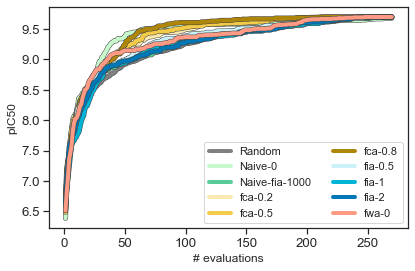

In [7]:
# #-----------------------
# # OBJECTIVE TRACE PLOTS
# #-----------------------

fig, ax = plt.subplots(1, 1)
up_to=270
# random
plot_max_trace_mean(data_random, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['random'][0], label='Random')
# naive
plot_max_trace_mean(data_naive_naive_0, up_to=up_to, ax=ax,unc=False,  stde=True, color=mypalette['naive'][0], label='Naive-0')
plot_max_trace_mean(data_naive_fia_1000, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['naive'][1], label='Naive-fia-1000')
# fca
plot_max_trace_mean(data_naive_fca_02, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fca'][0], label='fca-0.2')
plot_max_trace_mean(data_naive_fca_05, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fca'][1], label='fca-0.5')
plot_max_trace_mean(data_naive_fca_08, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fca'][2], label='fca-0.8')
# fia
plot_max_trace_mean(data_naive_fia_05, up_to=up_to, ax=ax,unc=False,  stde=True, color=mypalette['fia'][0], label='fia-0.5')
plot_max_trace_mean(data_naive_fia_1, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fia'][1], label='fia-1')
plot_max_trace_mean(data_naive_fia_2, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fia'][2], label='fia-2')
# fwa
plot_max_trace_mean(data_naive_fwa_0, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fwa'][0], label='fwa-0')


ax.legend(loc='lower right', ncol=2, fontsize=11)
ax.set_xlabel('# evaluations', fontsize=12)
ax.set_ylabel('pIC50', fontsize=12)



plt.tight_layout()
# plt.savefig('objective_traces_mean.png', dpi=300)

In [8]:
# #---------------------------
# # OBJECTIVE RANK TRACE PLOTS
# #---------------------------

# fig, ax = plt.subplots(1, 1)
# up_to=270 
# # random
# plot_min_rank_trace_mean(data_random, up_to=up_to, ax=ax,unc=False,  stde=True, color=mypalette['random'][0], label='Random')
# # naive
# plot_min_rank_trace_mean(data_naive_naive_0, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['naive'][0], label='Naive-0')
# plot_min_rank_trace_mean(data_naive_fia_1000, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['naive'][1], label='Naive-fia-1000')
# # fca
# plot_min_rank_trace_mean(data_naive_fca_02, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fca'][0], label='fca-0.2')
# plot_min_rank_trace_mean(data_naive_fca_05, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fca'][1], label='fca-0.5')
# plot_min_rank_trace_mean(data_naive_fca_08, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fca'][2], label='fca-0.8')
# # fia
# plot_min_rank_trace_mean(data_naive_fia_05, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fia'][0], label='fia-0.5')
# plot_min_rank_trace_mean(data_naive_fia_1, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fia'][1], label='fia-1')
# plot_min_rank_trace_mean(data_naive_fia_2, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fia'][2], label='fia-2')
# # fwa
# plot_min_rank_trace_mean(data_naive_fwa_0, up_to=up_to, ax=ax, unc=False, stde=True, color=mypalette['fwa'][0], label='fwa-0')

# ax.legend(loc='upper right', ncol=2, fontsize=11)
# ax.set_yscale('log')
# ax.set_xlabel('# evaluations', fontsize=12)
# ax.set_ylabel('best candidate rank', fontsize=12)
# plt.tight_layout()
# # plt.savefig('rank_traces_mean.png', dpi=300)

In [8]:
def make_num_evals_df(all_data, top_x=1):
    ''' make data frame of number of evals and number of nans
    '''
    frame = {'method': [], 'planner': [], 'params': [], 'desc': [], 
             'num_evals': [], 'num_nans': [], 'num_nans_eff': []}
    for data in all_data:
        print('method :', data['method'])
        num_evals, num_nans = get_num_eval_top_x(data['data'], top_x=top_x)
        
        feas_ratio = 213/270
        exp_num_nans = np.array(num_evals)*(1-feas_ratio)
        num_nans_eff = np.array(num_nans) - exp_num_nans
        
        assert len(num_evals)==len(num_nans)==len(num_nans_eff)
        
        frame['method'].extend( [data['method']]*len(num_evals) )
        frame['planner'].extend( [data['planner']]*len(num_evals) )
        frame['params'].extend( [data['params']]*len(num_evals) )
        frame['desc'].extend( [data['desc']]*len(num_evals))
        frame['num_evals'].extend(num_evals)
        frame['num_nans'].extend(num_nans)
        frame['num_nans_eff'].extend(num_nans_eff)

    print(len(frame['method']))
    print(len(frame['desc']))
    print(frame['desc'])
    
    return pd.DataFrame(frame)

In [9]:
df_top_1 = make_num_evals_df(all_data, top_x=1)
print(df_top_1.shape)
df_top_1.head()

method : random
method : naive_gryffin-naive-0
method : naive_gryffin-naive-fia-1000
method : naive_gryffin-fwa-0
method : naive_gryffin-fca-0.2
method : naive_gryffin-fca-0.5
method : naive_gryffin-fca-0.8
method : naive_gryffin-fia-0.5
method : naive_gryffin-fia-1
method : naive_gryffin-fia-2
method : static_gryffin-naive-0
method : static_gryffin-naive-fia-1000
method : static_gryffin-fwa-0
method : static_gryffin-fca-0.2
method : static_gryffin-fca-0.5
method : static_gryffin-fca-0.8
method : static_gryffin-fia-0.5
method : static_gryffin-fia-1
method : static_gryffin-fia-2
method : dynamic_gryffin-naive-0
method : dynamic_gryffin-naive-fia-1000
method : dynamic_gryffin-fwa-0
method : dynamic_gryffin-fca-0.2
method : dynamic_gryffin-fca-0.5
method : dynamic_gryffin-fca-0.8
method : dynamic_gryffin-fia-0.5
method : dynamic_gryffin-fia-1
method : dynamic_gryffin-fia-2
method : wodesc-botorch-naive-0
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  '

error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
method : desc-mord-botorch-naive-replace
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  

,method,planner,params,desc,num_evals,num_nans,num_nans_eff
0,random,random,random,False,95,33,12.944444
1,random,random,random,False,203,56,13.144444
2,random,random,random,False,182,49,10.577778
3,random,random,random,False,210,56,11.666667
4,random,random,random,False,118,32,7.088889


In [10]:
df_top_1

,method,planner,params,desc,num_evals,num_nans,num_nans_eff
0,random,random,random,False,95,33,12.944444
1,random,random,random,False,203,56,13.144444
2,random,random,random,False,182,49,10.577778
3,random,random,random,False,210,56,11.666667
4,random,random,random,False,118,32,7.088889
...,...,...,...,...,...,...,...
2498,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,12,2,-0.533333
2499,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,27,11,5.300000
2500,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,12,2,-0.533333
2501,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,40,6,-2.444444


[<matplotlib.patches.Rectangle object at 0x17cf48700>, <matplotlib.patches.Rectangle object at 0x17cf102b0>, <matplotlib.patches.Rectangle object at 0x17cf4bac0>, <matplotlib.patches.Rectangle object at 0x17cf4b940>, <matplotlib.patches.Rectangle object at 0x17cf827a0>]


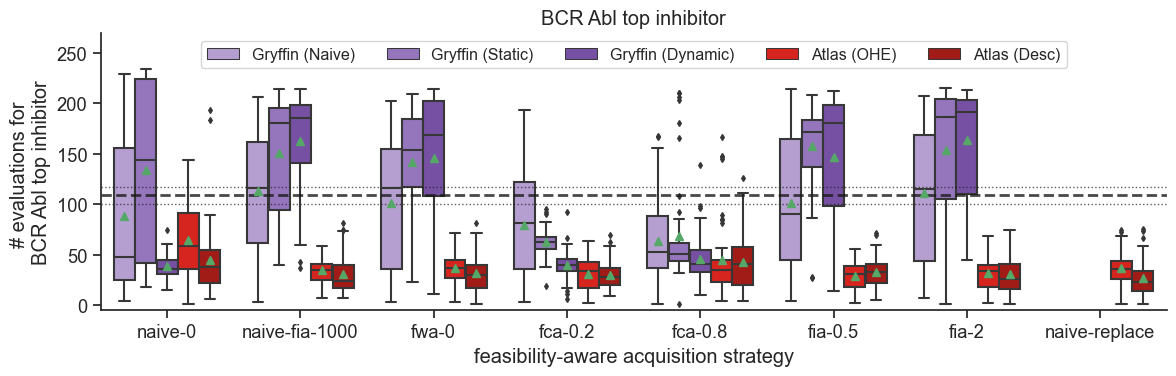

In [9]:
#--------------------------------
# [NUM EVAL] GRYFFIN VS. BOTORCH
#--------------------------------

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']

# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='desc-pca')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_evals', hue='desc', 
                     showmeans=True, ax=ax, linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = ax.get_legend_handles_labels()

print(handles)

ax.legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

ax.set_ylim(-5, 270)

ax.axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
ax.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
ax.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# ax.legend(loc='upper center', ncol=3)
ax.set_xlabel('feasibility-aware acquisition strategy')
ax.set_ylabel('# evaluations for \nBCR Abl top inhibitor')
ax.set_title('BCR Abl top inhibitor')
#ax.set_yscale('log')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.tight_layout()
#plt.savefig('abl-kinase-num-evals-boxplot.png', dpi=400)

[<matplotlib.patches.Rectangle object at 0x17aeed450>, <matplotlib.patches.Rectangle object at 0x17d350730>, <matplotlib.patches.Rectangle object at 0x17d383190>, <matplotlib.patches.Rectangle object at 0x17d383010>, <matplotlib.patches.Rectangle object at 0x17d3a9e70>]


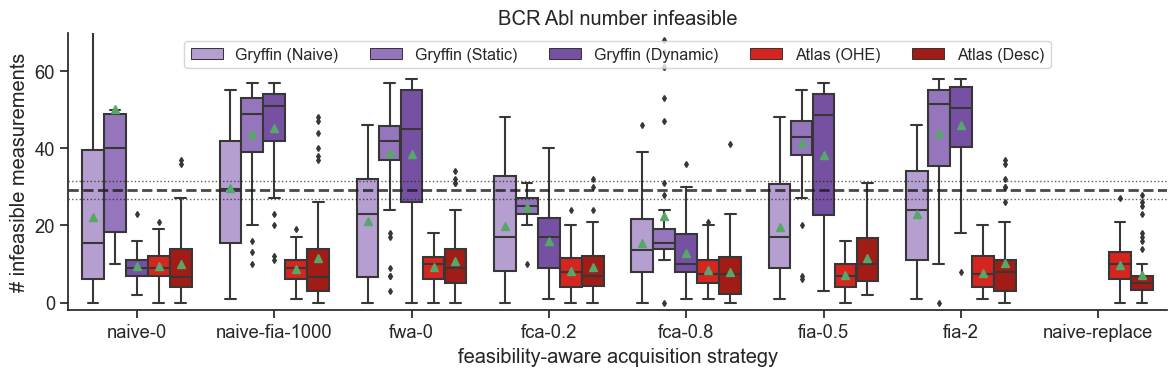

In [10]:
#--------------------------------
# [NUM NANS] GRYFFIN VS. BOTORCH
#--------------------------------

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']

# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='desc-pca')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_nans', hue='desc', 
                     showmeans=True, ax=ax, linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = ax.get_legend_handles_labels()

print(handles)

ax.legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

ax.set_ylim(-2, 70)

ax.axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
ax.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
ax.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# ax.legend(loc='upper center', ncol=3)
ax.set_xlabel('feasibility-aware acquisition strategy')
ax.set_ylabel('# infeasible measurements')
ax.set_title('BCR Abl number infeasible')
#ax.set_yscale('log')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.tight_layout()
#plt.savefig('abl-kinase-num-nans-boxplot.png', dpi=400)

[<matplotlib.patches.Rectangle object at 0x17e7e6e90>, <matplotlib.patches.Rectangle object at 0x17e79f850>, <matplotlib.patches.Rectangle object at 0x17e816b00>, <matplotlib.patches.Rectangle object at 0x17e83db70>, <matplotlib.patches.Rectangle object at 0x17e83f1c0>]


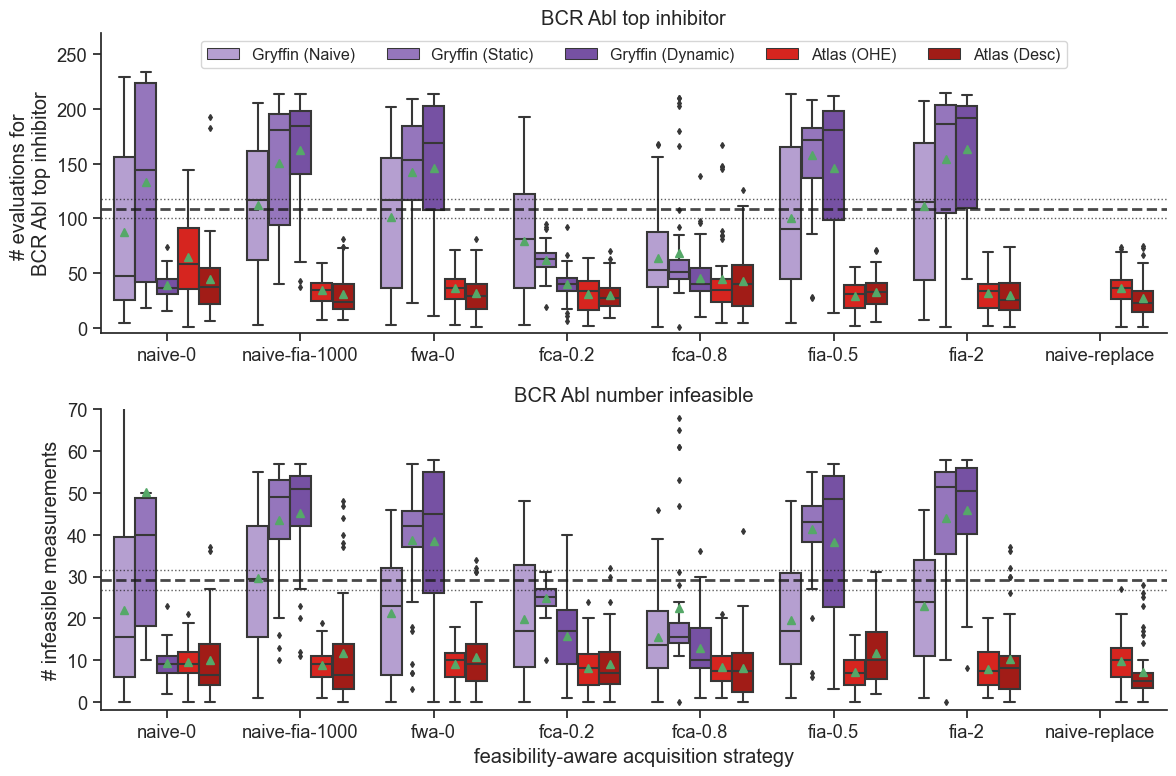

In [11]:
#--------------------------------------------
# [NUM EVALS + NUM_NANS] GRYFFIN VS. BOTORCH
#--------------------------------------------

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']


#-----------
# NUM EVALS 
#-----------
# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='desc-pca')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_evals', hue='desc', 
                     showmeans=True, ax=axes[0], linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = axes[0].get_legend_handles_labels()

print(handles)

axes[0].legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

axes[0].set_ylim(-5, 270)

axes[0].axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
axes[0].axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
axes[0].axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# axes[0].legend(loc='upper center', ncol=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('# evaluations for \nBCR Abl top inhibitor')
axes[0].set_title('BCR Abl top inhibitor')
#axes[0].set_yscale('log')
axes[0].spines.right.set_visible(False)
axes[0].spines.top.set_visible(False)

#-----------
# NUM NANS
#-----------
# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='desc-pca')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_nans', hue='desc', 
                     showmeans=True, ax=axes[1], linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

axes[1].set_ylim(-2, 70)

axes[1].axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
axes[1].axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
axes[1].axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# axes[1].legend(loc='upper center', ncol=3)
axes[1].set_xlabel('feasibility-aware acquisition strategy')
axes[1].set_ylabel('# infeasible measurements')
axes[1].set_title('BCR Abl number infeasible')
#ax.set_yscale('log')
axes[1].spines.right.set_visible(False)
axes[1].spines.top.set_visible(False)

axes[1].legend([],[], frameon=False)


plt.tight_layout()
plt.savefig('kinase_num_eval_num_nan.png', dpi=400)

[<matplotlib.patches.Rectangle object at 0x7fe11c9e7ac0>, <matplotlib.patches.Rectangle object at 0x7fe11c9ec580>, <matplotlib.patches.Rectangle object at 0x7fe11cbe95e0>, <matplotlib.patches.Rectangle object at 0x7fe11cbe95b0>, <matplotlib.patches.Rectangle object at 0x7fe11cbeb520>]


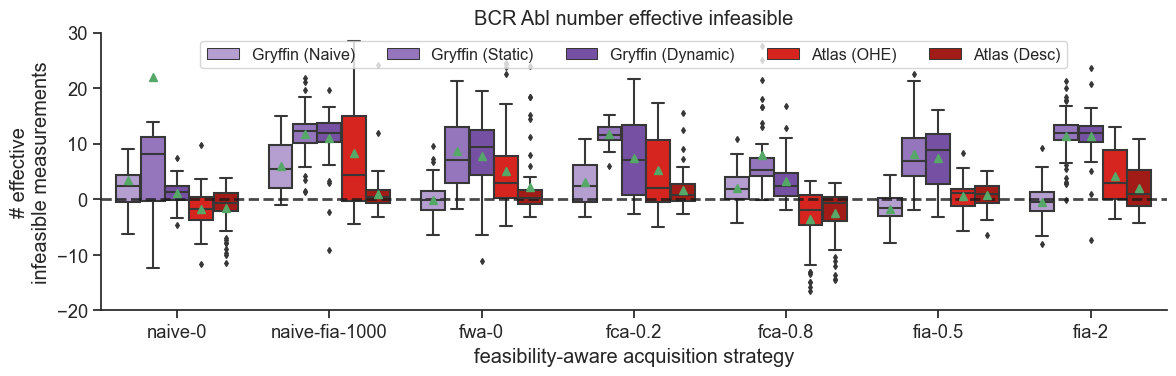

In [27]:
#------------------------------------
# [NUM NANS EFF] GRYFFIN VS. BOTORCH
#------------------------------------

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']

# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans_eff'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans_eff'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='desc-pca')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_nans_eff', hue='desc', 
                     showmeans=True, ax=ax, linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = ax.get_legend_handles_labels()

print(handles)

ax.legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

ax.set_ylim(-20, 30)

ax.axhline(0.0, lw=2, ls='--', c='k', alpha=0.8)
# ax.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# ax.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# ax.legend(loc='upper center', ncol=3)
ax.set_xlabel('feasibility-aware acquisition strategy')
ax.set_ylabel('# effective\ninfeasible measurements')
ax.set_title('BCR Abl number effective infeasible')
#ax.set_yscale('log')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.tight_layout()

In [18]:
def get_pvalues(
        data, 
        metric, # 'botorch':['wodesc', 'desc']
        strategies={
                'random':['False'], 
                'botorch':['wodesc', 'desc-mord'],  
#                 'gryffin':['naive', 'static', 'dynamic']
        },
        constraints=['naive-0', 'naive-replace', 'naive-fia-1000', 'fwa-0', 
                     'fca-0.2', 'fca-0.5', 'fca-0.8', 
                     'fia-0.5', 'fia-1', 'fia-2'],
    ):
    res = {'planner':[],'desc':[],'params':[], 'metric': []}
    gb = data.groupby(by=['planner', 'desc', 'params'])
    # random first
    #random = data[(data['planner']=='random')&(data['desc']==False)&(data['param']=='random')][metric].to_numpy()
    group = gb.get_group(('random', False, 'random'))
    mean = group.mean()[metric]
    
    res['planner'].append('random')
    res['desc'].append(False)
    res['params'].append('random')
    res['metric'].append(mean)
    
    for alg in ['botorch']: #'gryffin']:
        for desc in strategies[alg]:
            for param in constraints:
                group = gb.get_group((alg, desc, param))
                mean = group.mean()[metric]
                res['planner'].append(alg)
                res['desc'].append(desc)
                res['params'].append(param)
                res['metric'].append(mean)
                
    df = pd.DataFrame(res).sort_values(by='metric', ascending=True)
    
    signif = []
    
    best = df.iloc[0, :][['planner', 'desc', 'params']].tolist()
    best_res = data[
            (data['planner']==best[0])&\
            (data['desc']==best[1])&\
            (data['params']==best[2])][metric].to_numpy()
    
    print('BEST : ', '-'.join(best))
    signif.append(best)
    
    stop = False
    idx=1
    while not stop:
        
        new = df.iloc[idx, :][['planner', 'desc', 'params']].tolist()
        new_res = data[
            (data['planner']==new[0])&\
            (data['desc']==new[1])&\
            (data['params']==new[2])][metric].to_numpy()
        
        _, pval = stats.ttest_ind(best_res, new_res, equal_var=False)
        
        print('NEW : ', '-'.join(new))
        print(pval)
        if pval<0.05:
            stop=True
        else:
            signif.append(new)
            idx+=1
        
    
    
    return signif

In [19]:
def make_table(
    data,
    filename='mytable.txt',
    metric='num_evals_after',
    signif=[['dummy', 'dummy', 'dummy']], 
    strategies={
            'random':['False'], 
                'botorch':['wodesc', 'desc-mord'],  
#                 'gryffin':['naive', 'static', 'dynamic']
    },
    constraints=['naive-0', 'naive-replace', 'naive-fia-1000', 'fwa-0', 
                 'fca-0.2', 'fca-0.5', 'fca-0.8', 
                 'fia-0.5', 'fia-1', 'fia-2'],
    num_dec=1,
):
    ''' generate a latex table with the optimization experiment results
    '''
    gb = data.groupby(by=['planner', 'desc', 'params'])
    
    num_cols = len(constraints)+1 # plus one for planner col
    num_rows = np.sum([len(val) for key, val in strategies.items()])-1 # minus 1 for random sampling
    
    col_headers = ['planner']+constraints
    
    col_str = ' '.join(['c' for _ in range(num_cols)])
    f = ''
    
    # table header
    f+='\\begin{table}[!ht]\n\centering\n\caption{\ldots}\n\label{\ldots}\n\\begin{tabular}{'+col_str+'}\n'
    f+= '\\toprule\n'
    f+= ' & '.join([header for header in col_headers]) + '\\\ \n'
    f+= '\midrule\n'
    
    # random sampling first
    f+='random & '
    group = gb.get_group(('random', False, 'random'))
    mean, sem = group.mean()[metric], group.sem()[metric]
    f += f'{round(mean,num_dec)} $\pm$ {round(sem,num_dec)} & '
    to_add = ''.join([f'$-$ & ' for _ in range(num_cols-3)])
    f+= to_add 
    f+= '$-$ \\\ \n'
    
    for alg in ['botorch']: #'gryffin']:
        for desc in strategies[alg]:
            f += f'{alg}-{desc} & '
            for param in constraints:
                group = gb.get_group((alg, desc, param))
                mean, sem = group.mean()[metric], group.sem()[metric]

                if not [alg, desc, param] in signif:
                    if param == constraints[-1]:
                        f += f'${round(mean,num_dec)} \pm {round(sem,num_dec)}$ \\\ \n'
                    else:
                        f += f'${round(mean,num_dec)} \pm {round(sem,num_dec)}$ &'
                else:
                    if param == constraints[-1]:
                        f+='$\\bm{'
                        f += f'{round(mean,num_dec)} \pm {round(sem,num_dec)}'
                        f+= '}$ \\\ \n'
                    else:
                        f+='$\\bm{'
                        f += f'{round(mean,num_dec)} \pm {round(sem,num_dec)}'
                        f+= '}$ & '

    # end of table
    f+='\\bottomrule\n'
    f+='\end{tabular}\n'
    f+='\end{table}\n'

    # write table to file
    with open(filename, 'w') as file:
        file.write(f)
    
 

In [20]:
signif = get_pvalues(df_top_1, 'num_evals')
make_table(df_top_1, filename='kinase_num_evals.txt', metric='num_evals', signif=signif)

BEST :  botorch-desc-mord-naive-replace
NEW :  botorch-wodesc-fia-0.5
0.4874033901975723
NEW :  botorch-desc-mord-fca-0.2
0.29203353548705313
NEW :  botorch-desc-mord-fia-2
0.3353825563502051
NEW :  botorch-desc-mord-fia-1
0.2689584541773068
NEW :  botorch-wodesc-fca-0.2
0.2254045971436567
NEW :  botorch-desc-mord-naive-fia-1000
0.24663346879226017
NEW :  botorch-wodesc-fia-2
0.14534171412368624
NEW :  botorch-desc-mord-fwa-0
0.17271711659421568
NEW :  botorch-desc-mord-fia-0.5
0.08820661013179903
NEW :  botorch-wodesc-fia-1
0.06474988773967275
NEW :  botorch-wodesc-fca-0.5
0.03889670154630618


/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_37455/2720612955.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_37455/2720612955.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_37455/4235579416.py:37: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In additio

In [21]:
signif = get_pvalues(df_top_1, 'num_nans')
make_table(df_top_1, filename='kinase_num_nans.txt', metric='num_nans', signif=signif)

BEST :  botorch-desc-mord-naive-replace
NEW :  botorch-wodesc-fia-0.5
0.943162777014328
NEW :  botorch-wodesc-fia-2
0.5962693788640192
NEW :  botorch-wodesc-fia-1
0.5401250152364172
NEW :  botorch-wodesc-fca-0.5
0.48668467181104946
NEW :  botorch-desc-mord-fca-0.8
0.5289773160436344
NEW :  botorch-wodesc-fca-0.2
0.4488197629546614
NEW :  botorch-wodesc-fca-0.8
0.30844922909221695
NEW :  botorch-wodesc-naive-fia-1000
0.1557996557011284
NEW :  botorch-wodesc-fwa-0
0.08694671243016704
NEW :  botorch-desc-mord-fca-0.2
0.15715546823939955
NEW :  botorch-wodesc-naive-0
0.057533919521723605
NEW :  botorch-wodesc-naive-replace
0.03373420980104581


/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_37455/2720612955.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_37455/2720612955.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_37455/4235579416.py:37: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In additio